In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay

seed = 1234
np.random.seed(seed) 

In [2]:
# This may take a couple of minutes
cifar_X, cifar_y = fetch_openml("CIFAR_10", return_X_y=True, as_frame=False)

# Convert labels from strings to integers
cifar_y = cifar_y.astype(int)

# Convert pixels from floats to integers
cifar_X = cifar_X.astype(int)

In [3]:
cifar_X_tr, cifar_X_te, cifar_y_tr, cifar_y_te = train_test_split(cifar_X, cifar_y, test_size=0.4, 
                                                                  random_state=seed, shuffle=True)

In [4]:
# Do a 50-50 split of validation and test data
cifar_X_val, cifar_y_val = cifar_X_te[12000:], cifar_y_te[12000:]

cifar_X_te, cifar_y_te   = cifar_X_te[:12000], cifar_y_te[:12000]

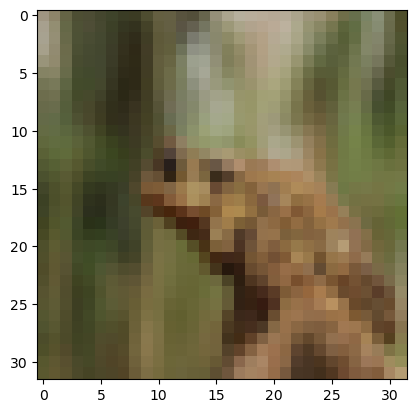

In [5]:
# Testing to see how the data can be displayed
fig, axes = plt.subplots() 

# Turn cifar_X_tr into 3x32x32 array representing RGB channels
channels = np.reshape(cifar_X_tr[1], newshape=(3,32,32))

transpose_channel = np.transpose(channels, (1,2,0))
axes.imshow(transpose_channel, interpolation='nearest')

In [13]:
# Train knn classifier for different ks
k_vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 15, 20]

trainError = np.array([])
validationError = np.array([])

for k in k_vals:
    print(f"Training knn classifer on k={k}...")
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(cifar_X_tr, cifar_y_tr)
    trainError = np.append(trainError, 1-knn.score(cifar_X_tr, cifar_y_tr))
    validationError = np.append(validationError, 1-knn.score(cifar_X_val, cifar_y_val))

Training knn classifer on k=1...
Training knn classifer on k=2...
Training knn classifer on k=3...
Training knn classifer on k=4...
Training knn classifer on k=5...
Training knn classifer on k=6...
Training knn classifer on k=7...
Training knn classifer on k=8...
Training knn classifer on k=9...
Training knn classifer on k=10...
Training knn classifer on k=12...
Training knn classifer on k=15...
Training knn classifer on k=20...


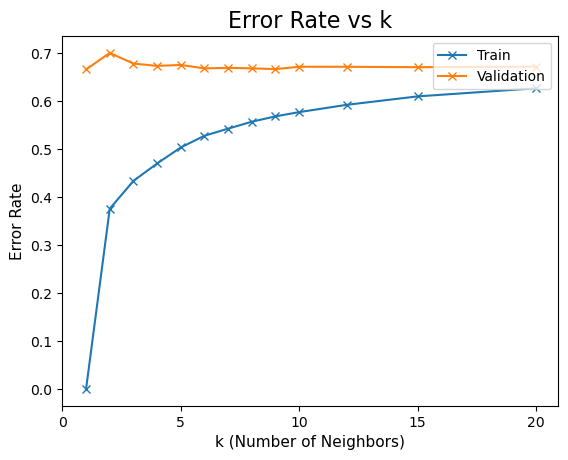

In [34]:
figure, axes = plt.subplots()

axes.plot(k_vals, trainError, marker='x')
axes.plot(k_vals, validationError, marker='x')

axes.set_xticks([0, 5, 10, 15, 20])

axes.set_title("Error Rate vs k", size=16)

axes.set_xlabel("k (Number of Neighbors)", size=11)
axes.set_ylabel("Error Rate", size=11)

axes.legend(["Train","Validation"], loc=1)

plt.show()

In [ ]:
# confusion matrix


In [ ]:
# graph training set size vs training and validation error rates
